In [6]:
# Import libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import py-feat as pf

from pathlib import Path


In [9]:
# Set up data directoty

# Jupyter notebook directory
notebook_dir = os.getcwd()

DATA_DIR = Path(notebook_dir).parent / "data"

print("DATA_DIR:", DATA_DIR.resolve())

# test load
df = pd.read_csv(DATA_DIR / "snapshot.csv")
print(df.head())


DATA_DIR: /Users/tranmaiphuong/Documents/Airline Project/spirit-airlines-dashboard/spirit_airlines_dashboard/data
   REVIEW_ID  CUSTOMER_ID        DATE_SUBMITTED_ID            DATE_FLOWN_ID  \
0      76319          250  2018-05-28 00:00:00.000  2018-05-01 00:00:00.000   
1      97709          726  2019-10-20 00:00:00.000  2019-10-01 00:00:00.000   
2      86952         1027  2019-02-09 00:00:00.000  2019-02-01 00:00:00.000   
3      41672         1597  2015-08-25 00:00:00.000  2015-08-01 00:00:00.000   
4      78657         1631  2018-07-19 00:00:00.000  2018-07-01 00:00:00.000   

   ORIGIN_LOCATION_ID  DESTINATION_LOCATION_ID  TRANSIT_LOCATION_ID  \
0                1484                     1092                 4740   
1                 979                     2501                 4740   
2                 265                     2501                 4740   
3                2633                     1890                 4740   
4                1427                     3104          

In [10]:
# Summary of numeric columns
df.describe()

,REVIEW_ID,CUSTOMER_ID,ORIGIN_LOCATION_ID,DESTINATION_LOCATION_ID,TRANSIT_LOCATION_ID,AIRCRAFT_ID,SEAT_COMFORT,CABIN_STAFF_SERVICE,FOOD_AND_BEVERAGES,INFLIGHT_ENTERTAINMENT,GROUND_SERVICE,WIFI_AND_CONNECTIVITY,VALUE_FOR_MONEY,AVERAGE_RATING
count,4671.000000,4671.000000,4671.000000,4671.000000,4671.000000,4671.000000,4290.000000,4268.000000,2261.000000,1747.000000,4318.000000,1538.000000,4670.000000,4670.000000
mean,90048.695782,56373.643117,2171.773710,2269.212802,4418.809677,38.971526,1.571329,1.946813,1.366652,1.109330,1.556044,1.130039,1.600000,1.585503
std,31325.170982,32895.474306,1344.893757,1311.216831,959.663120,10.377038,1.053110,1.387017,0.951256,0.526567,1.215102,0.577158,1.272373,1.045108
min,33327.000000,39.000000,35.000000,35.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,63614.500000,26937.000000,1092.000000,1119.500000,4740.000000,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,92741.000000,55789.000000,2443.000000,2501.000000,4740.000000,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,115572.500000,85797.000000,3281.000000,3294.000000,4740.000000,42.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.600000
max,147502.000000,114333.000000,4961.000000,4922.000000,4956.000000,42.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


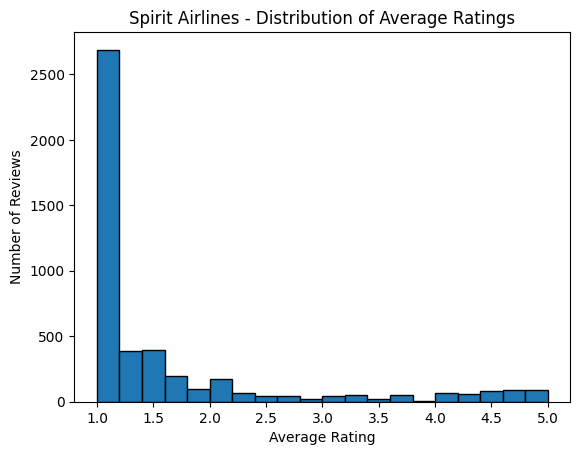

In [13]:
# Rating distribution

plt.hist(df["AVERAGE_RATING"], bins=20, edgecolor="black")
plt.xlabel("Average Rating")
plt.ylabel("Number of Reviews")
plt.title("Spirit Airlines - Distribution of Average Ratings")
plt.show()

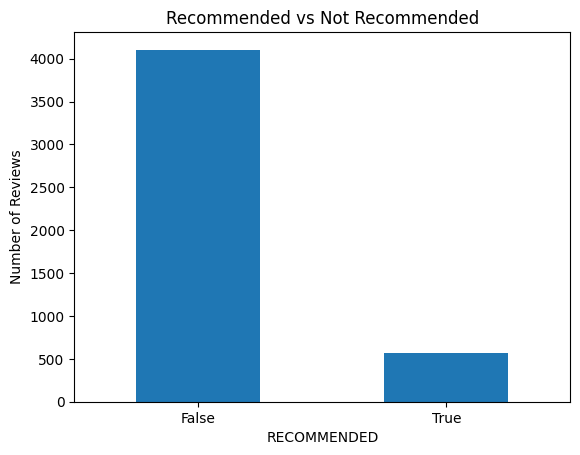

In [12]:
# Recommended vs Not Recommended
df["RECOMMENDED"].value_counts().plot(kind="bar")
plt.title("Recommended vs Not Recommended")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()


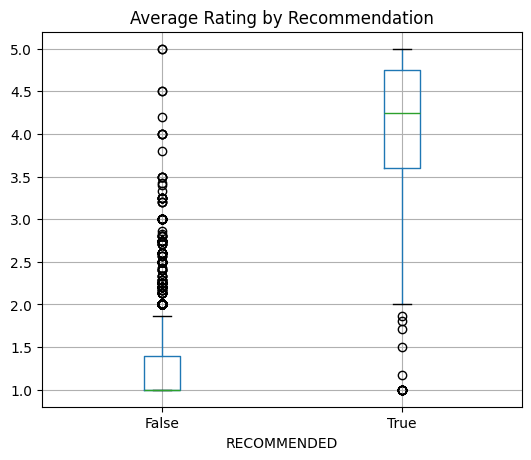

In [14]:
# Rating by Recommendation

df.boxplot(column="AVERAGE_RATING", by="RECOMMENDED", figsize=(6,5))
plt.title("Average Rating by Recommendation")
plt.suptitle("")
plt.show()


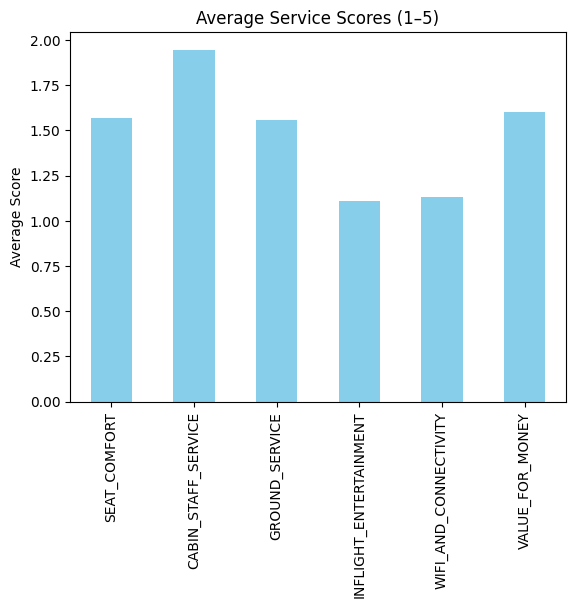

In [16]:
# Services

service_cols = ["SEAT_COMFORT", "CABIN_STAFF_SERVICE", "GROUND_SERVICE", 
                "INFLIGHT_ENTERTAINMENT", "WIFI_AND_CONNECTIVITY", "VALUE_FOR_MONEY"]

df[service_cols].mean().plot(kind="bar", color="skyblue")
plt.title("Average Service Scores (1–5)")
plt.ylabel("Average Score")
plt.show()


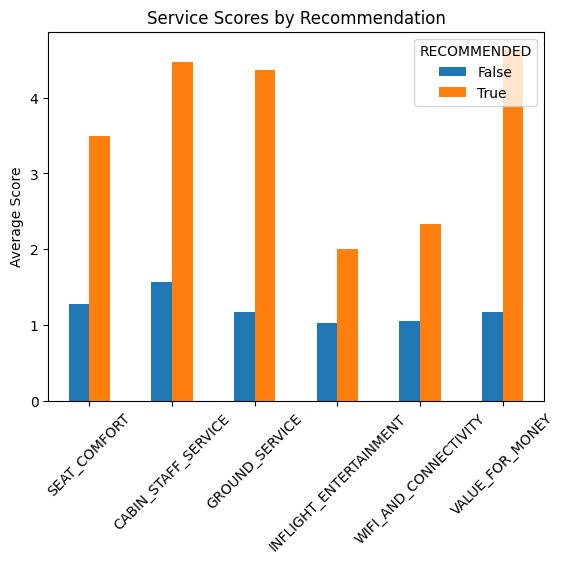

In [17]:
# Service score vs Recommendation

df.groupby("RECOMMENDED")[service_cols].mean().T.plot(kind="bar")
plt.title("Service Scores by Recommendation")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()


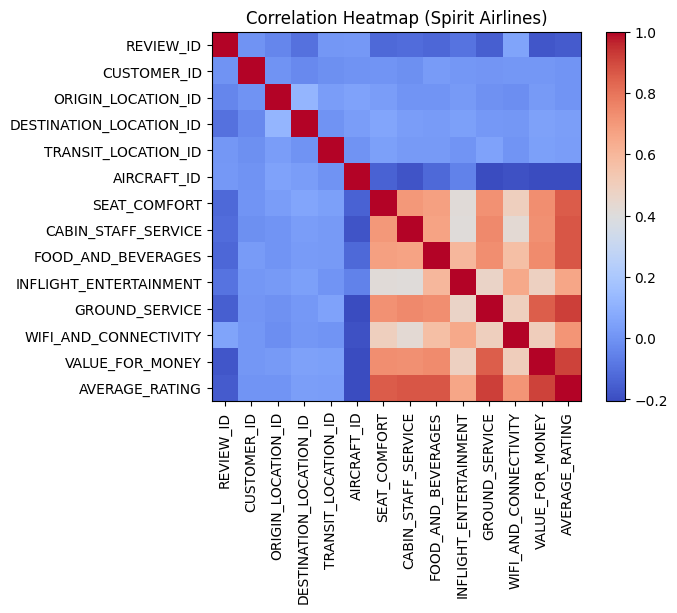

In [18]:
# Correlation

numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()

plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap (Spirit Airlines)")
plt.show()
